In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import funcoes as func

Vamos importar os dados e fazer e converter a coluna `date` para o tipo datatime. Isso nos ajudará a fazer umas análises mais poderosas de forma mais simples.

In [2]:
datasetTreino = pd.read_csv("./Dataset/train.csv")
data = datasetTreino.date.apply(lambda linha: datetime.strptime(linha, '%Y-%m-%d'))

datasetTreino['date'] = data
datasetTreino.set_index('date', inplace = True)
datasetTreino.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


Faremos uma análise exploratória simples, inicialmente, a fim de descobrir como os dados estão distribuídos e tentar achar algum insight. 

É importante verificar se há valores 'missings' no conjunto de dados.

In [3]:
datasetTreino.isna().sum()

store    0
item     0
sales    0
dtype: int64

In [4]:
datasetTreino.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


In [5]:
datasetTreino.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


Quanto mais conhecermos sobre nosso dataset melhor será o modelo criado. Até aqui já temos as seguintes informações:

* Não há valores missing.
* Conhecemos os tipos das variáveis.
* Olhando a média e mediana da coluna `Sales` há indicativos que a distribuição dessa coluna __não__ é uma distribuição normal.
* Há indicativos de outliers na coluna `Sales` também.

Primeiro vamos verificar a distibuição da coluna `Sales` e em seguinda vamos ver se há outliers. Muito modelos de machine learning trabalham melhor quando a distribuição é normal.

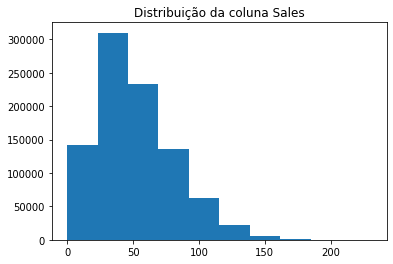

In [6]:
plt.title("Distribuição da coluna Sales")
plt.hist(datasetTreino['sales'])
plt.show()

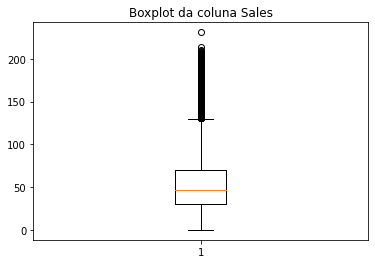

In [7]:
plt.title("Boxplot da coluna Sales")
plt.boxplot(datasetTreino['sales'])
plt.show()

Conforme suspeitavámos a distribuição não é normal e há outliers na coluna `sales`.

Vamos fazer um gráfico simples para verificar conforme as vendas variam com o tempo.

E agruparemos as vendas média por loja para saber quais lojam vendem mais em média.

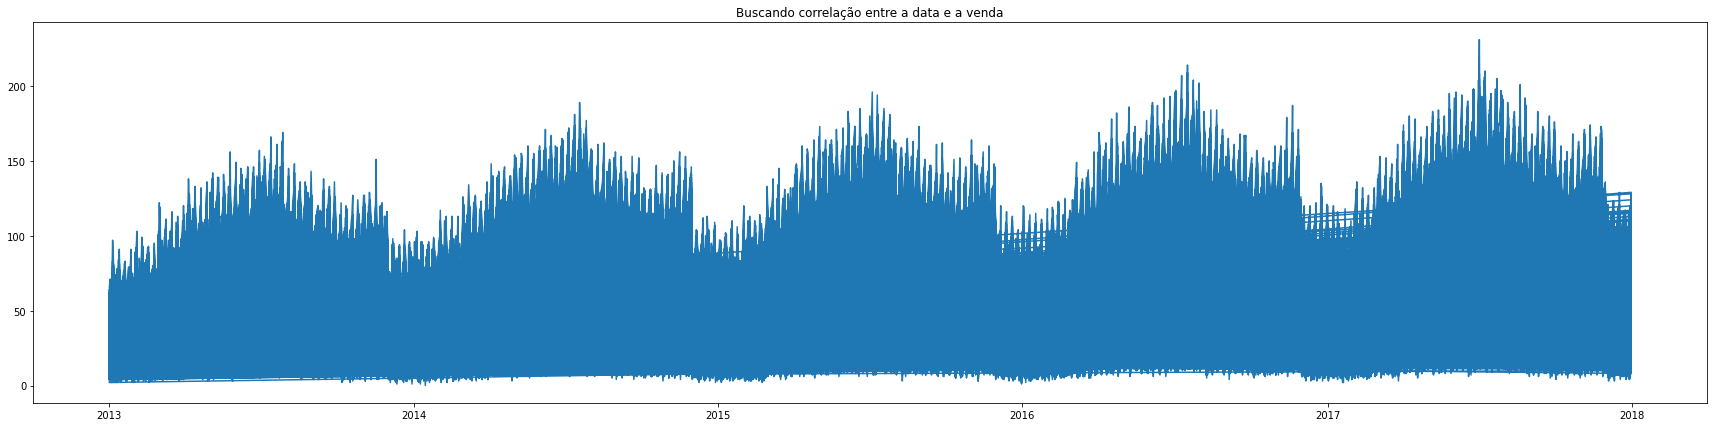

In [8]:
plt.figure(figsize=(30,7))
plt.title("Buscando correlação entre a data e a venda")
plt.plot(datasetTreino.index, datasetTreino['sales'])
plt.show()

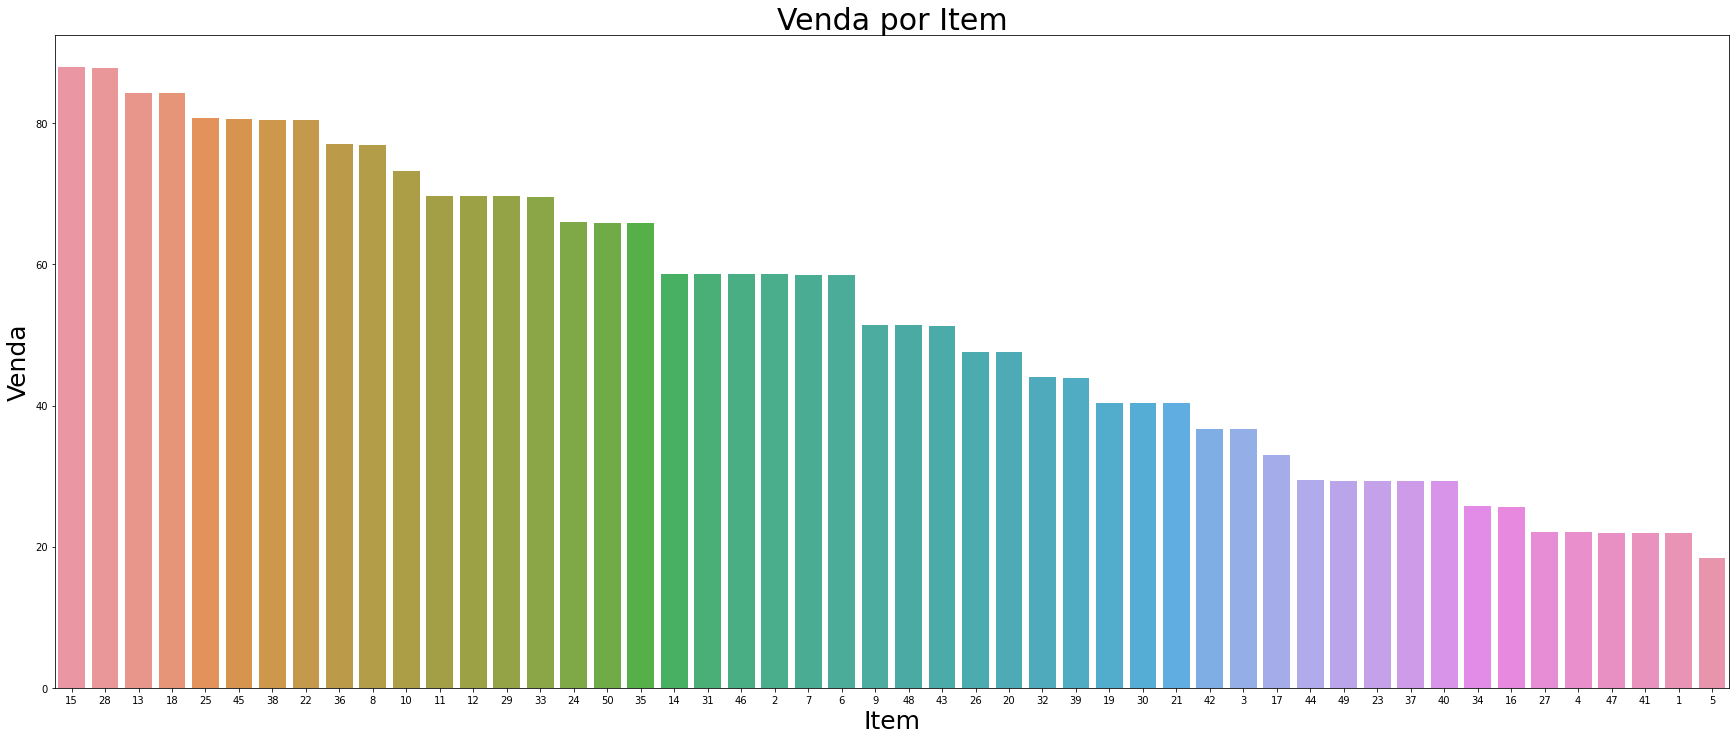

In [9]:
d = datasetTreino.groupby(['item']).mean().sales.sort_values(ascending=False)

x = d.index
y = d.values

plt.figure(figsize=(30, 12))
sns.barplot(x=x, y=y, order=x)

plt.title("Venda por Item", size=30)
plt.ylabel("Venda", size=25)
plt.xlabel('Item', size=25)
plt.show()

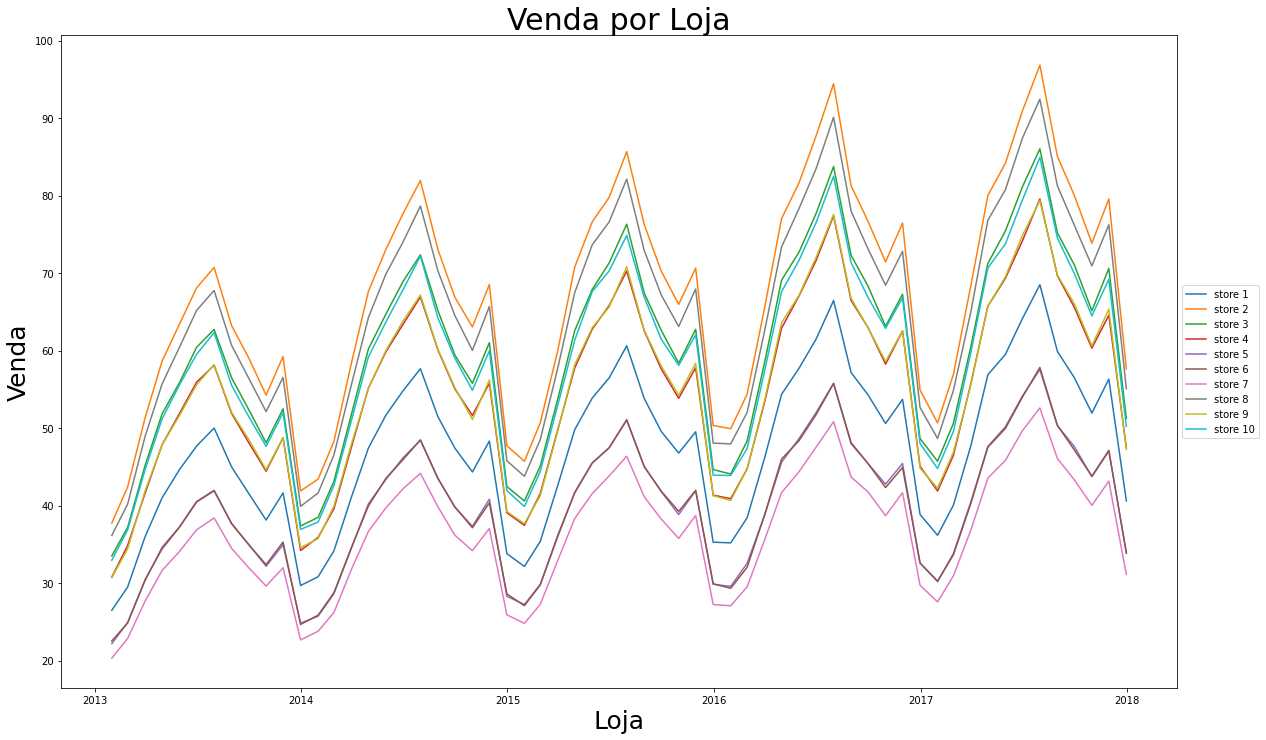

In [10]:
dataTemp = datasetTreino.reset_index().drop(['item'], axis = 1)

plt.figure(figsize=(20, 12))
for i in range(1, datasetTreino.store.max()+1):
    dTemp = dataTemp[dataTemp.store == i].resample("M", on='date').mean().sales
    
    x = np.array(dTemp.index)
    y = np.array(dTemp.values)
    plt.plot(x, y, label="store {}".format(i))

plt.title("Venda por Loja", size=30)
plt.ylabel("Venda", size=25)
plt.xlabel('Loja', size=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

As vendas seguem um formato padrão, parecendo uma função seno ou cosseno, as vendas crescem com o tempo e tem um pico mais ou menos no meio do período. Como há muitos registros fica ruim de ver as datas e saber em qual momento teremos o pico e o vale (data com menor venda). Precisaremos modificar os dados ou limitar a quantidade de dados a fim de pode visualizar melhor.

Sabemos também que uma loja vende em média mais do que as outras e que certos itens são mais vendidos, algo que é normal. Vamos criar um objeto __Serie__ para fazer umas análises mais poderosas.

In [11]:
ts = datasetTreino['sales']
ts

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    63
2017-12-28    59
2017-12-29    74
2017-12-30    62
2017-12-31    82
Name: sales, Length: 913000, dtype: int64

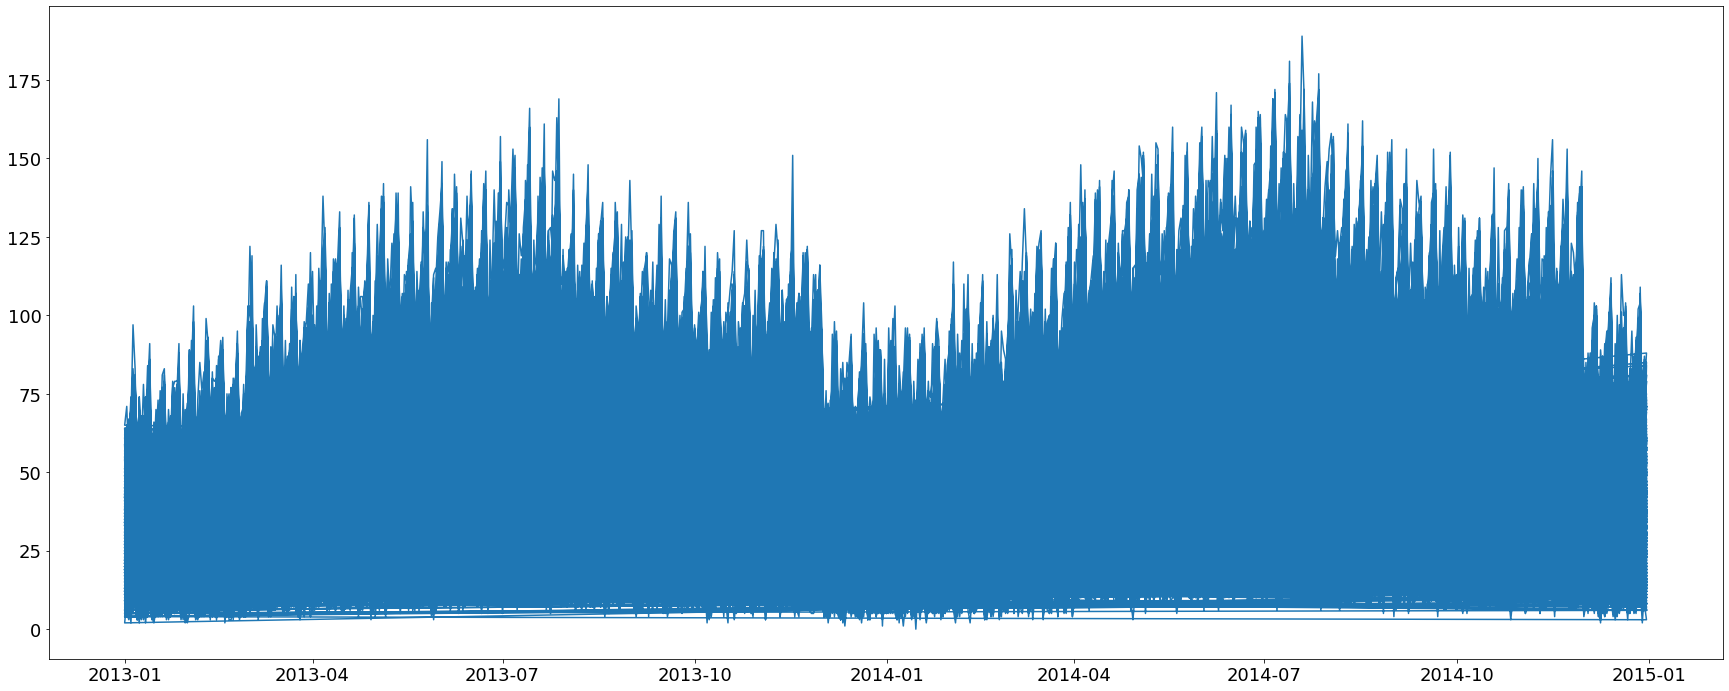

In [12]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(30,12))
plt.plot(ts['2013':'2014'])
plt.show()

Agora conseguimos ver as datas e com isso obtemos as seguintes informações:

* O período do gráfico é de 1 ano. Ou seja, o formato do gráfico se repete de 1 em 1 ano.
* O pico se dá mais ou menos no mês 7.
* O vale se dá no início do ano, mês 1.

Como os gráficos seguem o mesmo padrão. Esse comportamento será o mesmo para os anos seguintes.

Visualmente notamos que a série não é estacionária (ela varia com o tempo), mas seria mais seguro usar métodos análiticos também. Há um teste de hipótese conhecido como teste de `Dickey-Fuller` esse teste verifica se a série temporal é estacionária ou não. Por questão de desempenho não usarei esse teste aqui.

Faremos um outro método visual simples, mas que ajudará a verificar se a série é estacionária ou não. Uma regra simples, mas que nos atenderá nesse projeto é se a média e a variância (ou desvio-padrão) variarem com o tempo, então a série __não__ é estacionária.

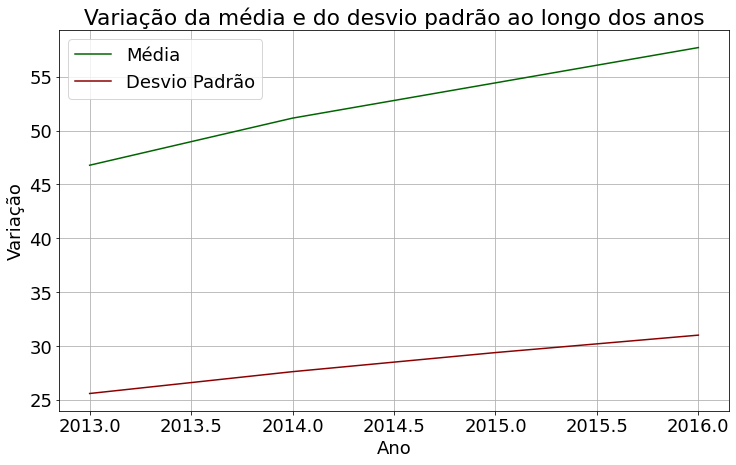

In [13]:
func.rolling(ts)

Não podemos passar uma série não estacionária para um modelo de machine learning. Podemos tratar isso de algumas formas.

__Continuação no arquivo__ `Data Wrangling`!

## FIM